# Discrete Random Variables 


## Learning Goals


1.  Know the definition  of a discrete  random  variable.

2.  Know the  Bernoulli,  binomial,  and  geometric  distributions and  examples  of what  they model.

3.  Be able to describe  the  probability mass function  and  cumulative distribution function using tables  and formulas.

4.  Be able to construct new random  variables  from old ones.

5.  Know how to compute  expected  value (mean).


##    Random Variables


This quiz is largely about  testing your knowledge for some useful terminology,  building  on the notions  of sample space and probability function.  The key words are

1.  Random  variable

2.  Probability mass function  (pmf)

3.  Cumulative distribution function  (cdf)


### Recall

A discrete sample space $\Omega$ is a finite or listable set of outcomes $\left\{\omega_{1}, \omega_{2} \ldots\right\}$. The probability of an outcome $\omega$ is denoted $P(\omega)$. An event $E$ is a subset of $\Omega .$ The probability of an event $E$ is $P(E)=\sum_{\omega \in E} P(\omega) .$




### Random variables as  payoff functions

\begin{exercise}

Roll a die twice and record the outcomes  as (i, j), where i is the result  of the first roll and
j the result  of the second. 

a) What is the sample space?

b) What is the probability function $P(i,j)$?

In this  game,  you win 500 if the  sum is 7 and  lose 100 otherwise.   We give this  payoff function  the name X  and describe it formally by 

$$
X(i, j)=\left\{\begin{array}{ll}
500 & \text { if } i+j=7 \\
-100 & \text { if } i+j \neq 7
\end{array}\right.
$$

If we change the game by using the payoff function 

$$
Y(i, j)=i j-10
$$

c) which game is better?

\end{exercise}


These  payoff  functions  are  examples  of random  variables.  <font color='blue'> A random  variable  assigns  a number  to each outcome  in a sample space </font>.  More formally:

\begin{definition}
Let $\Omega$ be a sample space. A discrete random variable is a function
$$
X: \Omega \rightarrow \mathbf{R}
$$
that takes a discrete set of values. (Recall that $\mathbf{R}$ stands for the real numbers.)
\end{definition}


Why is X  called a random  variable?  It's `random` because its value depends  on a random outcome  of an experiment.  And we treat X  like we would a usual  variable:  we can add it to other  random  variables,  square it, and so on.

In [206]:
library(prob)
outcomes <- rolldie(2)
colnames(outcomes) <- c("Roll_1", "Roll_2")
first_part <- paste("(", outcomes$Roll_1, sep="")
second_part <- paste(outcomes$Roll_2, ")", sep="")
outcomes$results <- paste(first_part, second_part, sep=", ")
colnames(outcomes) <- c("Roll_1", "Roll_2", "(Roll_1, Roll_2)")
# for debugging
# outcomes
# temp$X3 <- results
# temp
#
# next we add a column with the X payoff 
for (i in c(1:36)) {
    if (outcomes[i, 1]+outcomes[i, 2]==7)
        outcomes$X_payoff[i] <- 500
    else
        outcomes$X_payoff[i]<- -100
    outcomes$Y_payoff[i] <- outcomes$Roll_1[i] * outcomes$Roll_2[i] - 10
}

# calculate the number of the times we lose and the number of times we win with the X payoff function
print("X payoff table:")
X_payoff_table <- table(outcomes$X_payoff)
X_payoff_table

# calculate the number of the times we lose and the number of times we win with the Y payoff function
print("Y payoff table:")
Y_payoff_table <- table(outcomes$Y_payoff)
Y_payoff_table
#outcomes




[1] "X payoff table:"



-100  500 
  30    6 

[1] "Y payoff table:"



-9 -8 -7 -6 -5 -4 -2 -1  0  2  5  6  8 10 14 15 20 26 
 1  2  2  3  2  4  2  1  2  4  2  1  2  2  2  1  2  1 


__Answer 1:__  
__a)__ The sample space $\Omega$ of the experiment is the set that includes all the elements of the third column of the above matrix. $\Omega = \left{ (1, 1), (2, 1), (3,1) ...(6,6)\right}$  

__b)__ The probability function is $ P(i, j) = \frac {1}{36}$

__c)__ The above code has some calculations in comments. What follows is an answer based on these calculations  
\begin{itemize}
\item X payoff:
\begin{itemize}
\item We can see from the table we extracted that the number of times we may win is 6 while the times we might lose is 30  
This means that for each time we play the game we have a probability of 1/6 to win and 5/6 to lose. 
\item The amount we win in 1 play (500) will be followed with 5 times of losing 100 (500). So playing the game for n consecutive times will finally leave us with the same amount he had when we started playing. 
\end{itemize}
\item Y payoff:
\end{itemize}

## Events and random variables

For  any  value  $a$  we write  <font color='blue'> $X  = a$ </font> to  mean  the  <font color='blue'>event</font>  consisting  of all  outcomes $\omega$  with $X(\omega) = a$.

\begin{exercise}
In the previous exercise we rolled two dice and defined the payoff function X (which is a random variable)

a) What is the event <font color='blue'>$X = 500$</font>?

b) what is the $P(X = 500)$?

c) What is the event $X = 1000$ and its probability $P(X = 1000)$?

\end{exercise}




## Probability mass function and cumulative distribution function


\begin{definition}

The <font color='blue'>probability mass function (pmf)</font> of a discrete random variable is the function $p(a)=P(X=a)$
Note:

1. We always have $0 \leq p(a) \leq 1$.

2. We allow $a$ to be any number. If $a$ is a value that $X$ never takes, then $p(a)=0$.

\end{definition}


\begin{exercise}
Let  $\Omega$ be our  earlier  sample  space  for rolling  2 dice.   Define  the  random variable  $M$  to be the maximum  value of the two dice:

$$M(i, j) = max(i, j)$$.

For example,  the roll (3,5) has maximum  5, i.e. M(3, 5) = 5.

a) What are the values of $p(a)$ for $a = 1, 2, 3, 4, 5, 6$

b) What  is $p(8)$?

\end{exercise}



## Events and inequalities

Inequalities  with  random  variables  describe  events.   For  example  $X  \le a$ is the  set  of all outcomes  $\omega$ such that $X(\omega) \le a$.

\begin{exercise}
If our sample space is the set of all pairs of $(i, j)$ coming from rolling two dice and $Z(i, j) = i + j$ is the sum of the dice then 

What is the set $Z \le 4$?
\end{exercise}



## The cumulative distribution function (cdf)

\begin{definition}
The  <font color='blue'>cumulative distribution  function  (cdf)</font>  of a  random  variable  $X$  is the function  $F$  given by $F(a) = P (X \le a)$.  We will often shorten  this to <font color='blue'>distribution function</font>.

Note  that the  definition  of $F(a)$  uses the symbol  less than  <font color='orange'>or  equal</font>.   This  will be important for getting your calculations  exactly  right.
\end{definition}


\begin{example}
Continuing with the previously defined random variable  M, we have

\begin{array}{rlcccccc}
\text { value } & a: & 1 & 1 & 3 & 4 & 5 & 6 \\
\text { pmf } & p(a): & 1 / 36 & 3 / 36 & 5 / 36 & 7 / 36 & 9 / 36 & 11 / 36 \\
\text { cdf } & F(a): & 1 / 36 & 4 / 36 & 9 / 36 & 16 / 36 & 25 / 36 & 36 / 36
\end{array}

\end{example}


$F(a)$ is called the **cumulative** distribution function  because $F(a)$ gives the total  probability that accumulates by adding up the probabilities $p(b)$ as $b$ runs from $−infty$ to $a$.  For example, in the table  above, the entry  $16/36$ in column 4 for the cdf is the sum of the values of the pmf from column 1 to column 4. In notation:

As events: $M \leq 4 =\{1,2,3,4\}$ ; $F(4)=P(M \leq 4)=1/36+3/36+5/36+7/36=16 / 36$

Just  like the  probability mass  function,  $F(a)$  is defined  for all  values  a.   In  the  above example,  $F(8)=1, F(-2)=0, F(2.5)=4/36,$ and $F(\pi)=9/36$

## Graphs of $p(a)$  and $F(a)$

We can visualize the pmf and cdf with graphs.  For example,  let $X$ be the number  of heads in 3 tosses of a fair coin:


\begin{aligned}
&\begin{array}{ccccc}
\text { value } a: & 0 & 1 & 2 & 3 \\
\operatorname{pmf} p(a): & 1 / 8 & 3 / 8 & 3 / 8 & 1 / 8 \\
\operatorname {cdf } F(a): & 1 / 8 & 4 / 8 & 7 / 8 & 1
\end{array}
\end{aligned}


The colored graphs show how the cumulative distribution function is built by accumulating
probability as a increases.  The black and white graphs are the more standard presentations.

![graphs](pmf_pcf.png)

\begin{exercise}
Plot the pmf and cdf for the maximum of two  dice exercise.
\end{exercise}



##  Properties of the cdf $F$ 

The cdf $F$  of a random  variable  satisfies several properties:

1.  $F$  is **non-decreasing**.  That is, its graph never goes down, or symbolically if $a \le b$ then $F(a) \le F(b)$.

2.  $0 \le F(a) \le 1$.

3.  $\lim _{a \rightarrow \infty} F(a)=1, \quad \lim _{a \rightarrow-\infty} F(a)=0$

In  words,  (1)  says  the  cumulative probability  $F(a)$  increases  or  remains  constant  as  $a$ increases,  but never  decreases;  (2)  says the  accumulated probability is always  between  0 and 1; (3) says that as a gets very large, it becomes more and more certain  that $X \le a$ and as a gets very negative  it becomes more and more certain  that $X > a$.

\begin{exercise}
Why does a cdf satisfy each of these properties?
\end{exercise}

## Specific Distributions


### Bernoulli Distributions

**Model**:  The  Bernoulli  distribution models one trial  in an  experiment that can  result  in either  **success** or **failure**  This  is the  most  important distribution and it is also the  simplest.   A random  variable  $X$  has a Bernoulli distribution with parameter $p$ if: 


1.  $X$  takes  the values 0 and 1.

2. $P(X=1)=p$ and $P(X=0)=1-p$.

We will write $X \sim$ Bernoulli $(p)$ or $\operatorname{Ber}(p)$, which is read **“X  follows a Bernoulli distribution with parameter p”** or **“X  is drawn  from a Bernoulli  distribution with parameter p”**.

A simple model for the  Bernoulli  distribution is to flip a coin with  probability $p$ of heads, with  $X  = 1$ on heads  and  $X  = 0$ on tails.   The  general  terminology  is to  say $X$  is 1 on success and 0 on failure, with success and failure defined by the context.

Many decisions can be modeled as a binary  choice, such as votes for or against  a proposal. If $p$ is the proportion of the voting population that favors the proposal,  than  the vote of a random  individual  is modeled by a _Bernoulli(p)_.

Here are the  table  and  graphs  of the  pmf and  cdf for the  Bernoulli(1/2) distribution and below that for the general Bernoulli(p)  distribution.

![bernoulli](bernouli_fun.png)

## Binomial Distributions

The binomial  distribution $Binomial(n,p)$, or $Bin(n,p)$, models the number  of successes in n **independent Bernoulli(p)  trials**.

A single Bernoulli  trial  is, say,  one toss  of a coin.   A single binomial  trial  consists of n Bernoulli trials.  For coin ﬂips the sample space for a Bernoulli trial  is $\{H, T \}$. The sample space for a binomial  trial  is all **sequences** of heads and tails of length n.  Likewise a Bernoulli random  variable takes values 0 and 1 and a binomial random variables  takes  values $0, 1, 2, \dots , n$.

\begin{remark}
Binomial(1,p)  is the same as Bernoulli(p). 

\end{remark}

\begin{example}

The number  of heads in n flips of a coin with probability $p$ of heads follows a **Binomial(n, p)** distribution.

We describe $X \sim \operatorname{Binomial}(n, p)$ by giving its values and probabilities. For notation we will use $k$ to mean an arbitrary number  between  0 and n.

We remind you that $n$ choose $k=\left(\begin{array}{l}n \\ k\end{array}\right)={ }_{n} C_{k}$ is the number of ways to choose $k$ things out of a collection of $n$ things and it has the formula

$$\left(\begin{array}{l}n \\ k\end{array}\right)=\frac{n !}{k!(n-k)!}$$

Here is a table for the pmf of a Binomial(n,k) random variable

$$
\begin{array}{cccccc}
\text { values } a: & 0 & 1 & 2 & \cdots & k & \cdots & n \\
\operatorname{pmf} p(a): & (1-p)^{n} & \left(\begin{array}{c}
n \\
1
\end{array}\right) p^{1}(1-p)^{n-1} & \left(\begin{array}{c}
n \\
2
\end{array}\right) p^{2}(1-p)^{n-2} & \cdots & \left(\begin{array}{c}
n \\
k
\end{array}\right) p^{k}(1-p)^{n-k} & \cdots & p^{n} \\
\hline
\end{array}
$$

\end{example}


\begin{exercise}
What  is the pobability of 3 or more heads in 5 tosses of a fair coin?
\end{exercise}


##     Explanation of the binomial probabilities

For concreteness,  let $n = 5$ and $k = 2$ (the  argument for arbitrary n and k is identical.)  So $X \sim \operatorname{binomial}(5, p)$ and we want to compute  $p(2)$.  The long way to compute  $p(2)$ is to list all the  ways to get exactly  2 heads  in 5 coin flips and  add  up their  probabilities.  The  list has 10 entries:

HHTTT, HTHTT, HTTHT, HTTTH, THHTT, THTHT, THTTH, TTHHT, TTHTH, TTTHH 


Each entry  has the same probability of occurring,  namely

$$p^2(1 − p)^3$$.

This is because each of the  two heads has probability $p$ and each of the  3 tails  has probability  $1 − p$.  Because  the  individual  tosses are independent,  we can multiply  probabilities. Therefore,  the  total  probability of exactly  2 heads is the  sum of 10 identical  probabilities, i.e.    $p(2)=10 p^{2}(1-p)^{3}$.

This guides us to the shorter  way to do the computation. We have to count the number  of sequences with  exactly  2 heads.  To do this  we need to choose 2 of the  tosses to be heads and  the  remaining  3 to be tails.  The  number  of such sequences is the  number  of ways to 
choose 2 out  of 5 things,  that is $\left(\begin{array}{l}5 \\ 2\end{array}\right)$.  Since each such sequence  has the  same probability,  $p^2(1 − p)^3$, we get the probability of exactly  2 heads $p(2)=\left(\begin{array}{c}5 \\ 2\end{array}\right) p^{2}(1-p)^{3}$.

Here are some binomial probability mass function (here, frequency is the same as probability). 

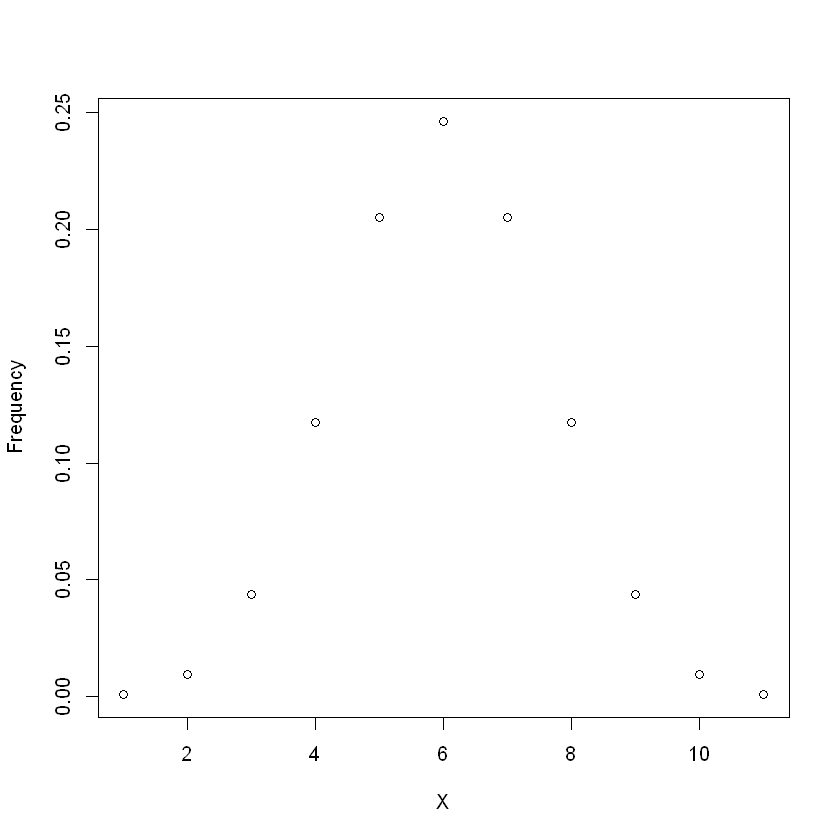

In [12]:
#First, we have to create a vector of quantiles as input for the dbinom R function:

x_dbinom <- seq(0, 10, by = 1)                       # Specify x-values for binom function

#Then, we can apply the dbinom function to this vector as shown below. 
#Note that I have specified the size to be equal to 10 (i.e. the number of trials) and the 
#probability for each binomial draw to be equal to 0.5 (i.e. 50%). 

y_dbinom <- dbinom(x_dbinom, size = 10, prob = 0.5)  # Apply dbinom function

#If we want to illustrate the output of the dbinom function in a graphic, we can use the plot function:

plot(y_dbinom, xlab="X", ylab = "Frequency")                                        # Plot dbinom values



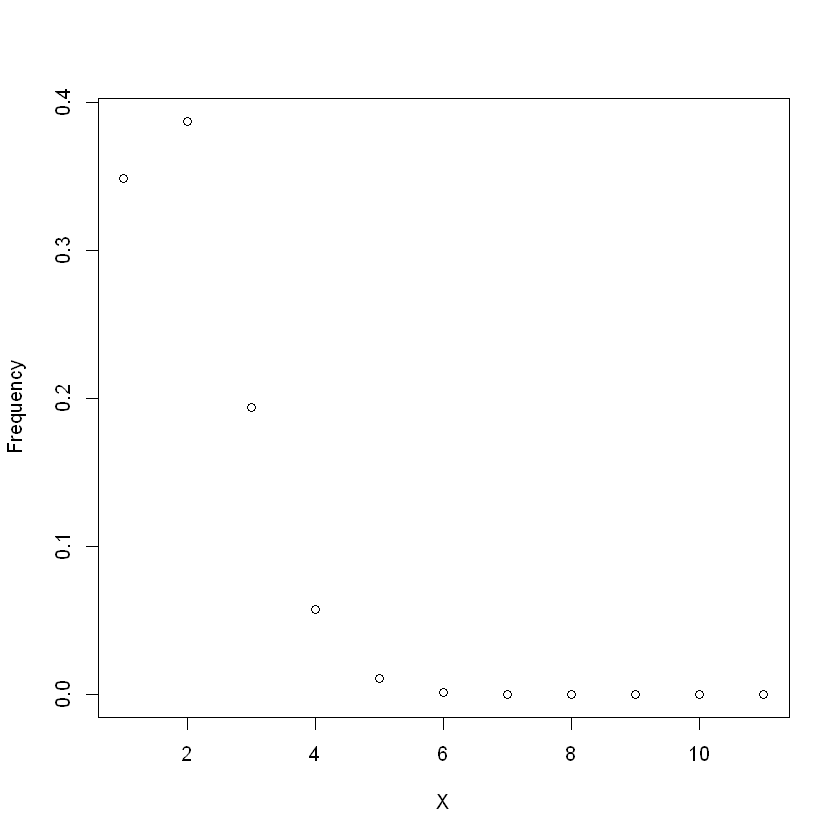

In [13]:
#First, we have to create a vector of quantiles as input for the dbinom R function:

x_dbinom <- seq(0, 10, by = 1)                       # Specify x-values for binom function

#Then, we can apply the dbinom function to this vector as shown below. 
#Note that I have specified the size to be equal to 10 (i.e. the number of trials) and the 
#probability for each binomial draw to be equal to 0.1 

y_dbinom <- dbinom(x_dbinom, size = 10, prob = 0.1)  # Apply dbinom function

#If we want to illustrate the output of the dbinom function in a graphic, we can use the plot function:

plot(y_dbinom,xlab="X", ylab = "Frequency")                                        # Plot dbinom values


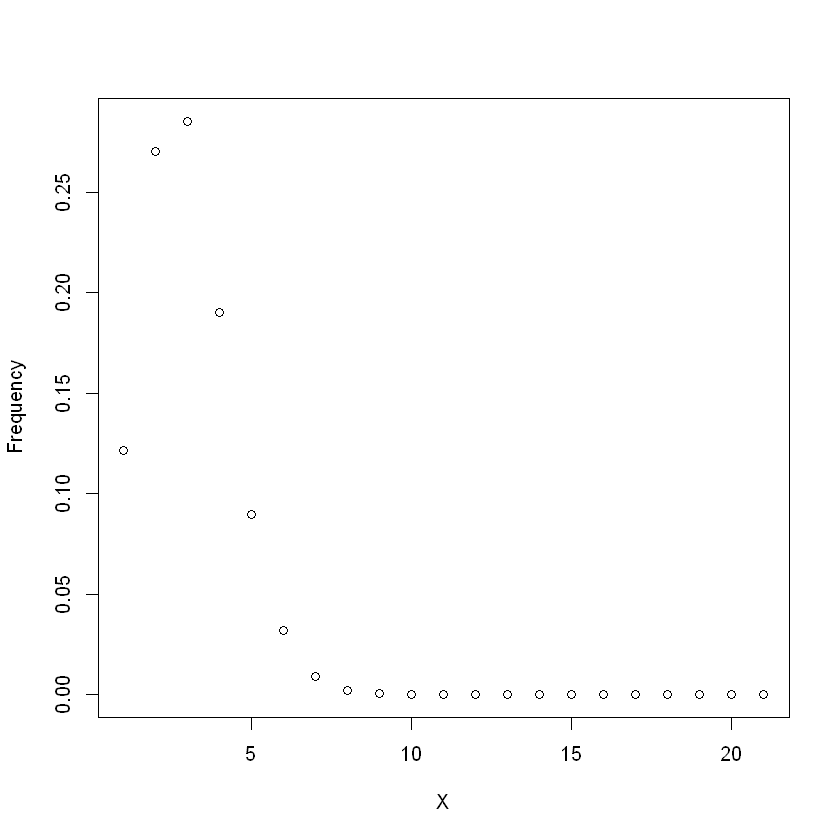

In [14]:
#First, we have to create a vector of quantiles as input for the dbinom R function:

x_dbinom <- seq(0, 20, by = 1)  # Specify x-values for binom function 

y_dbinom <- dbinom(x_dbinom, size = 20, prob = 0.1)  # Apply dbinom function

#If we want to illustrate the output of the dbinom function in a graphic, we can use the plot function:

plot(y_dbinom,xlab="X", ylab = "Frequency")  # Plot dbinom values


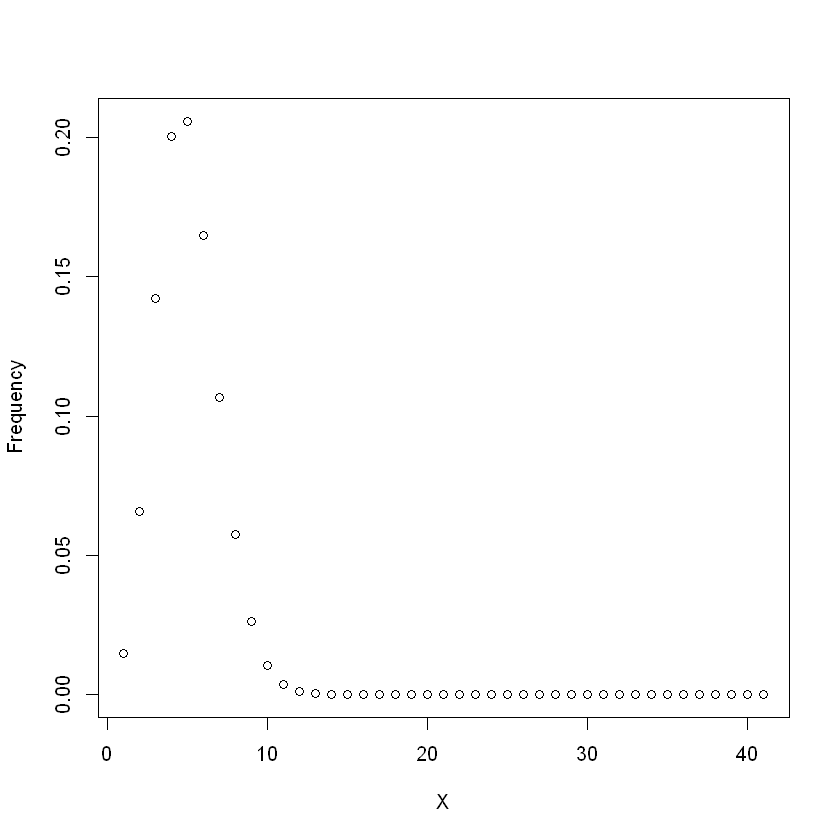

In [15]:
#First, we have to create a vector of quantiles as input for the dbinom R function:

x_dbinom <- seq(0, 40, by = 1)  # Specify x-values for binom function 

y_dbinom <- dbinom(x_dbinom, size = 40, prob = 0.1)  # Apply dbinom function

#If we want to illustrate the output of the dbinom function in a graphic, we can use the plot function:

plot(y_dbinom,xlab="X", ylab = "Frequency")                                        # Plot dbinom values


## Geometric Distributions

\begin{definition}
A **geometric  distribution** models the  number  of tails  before the  first  head  in a sequence of coin flips (Bernoulli  trials).

\end{definition}

\begin{example}
(a) Flip a coin repeatedly. Let $X$ be the number  of tails before the first heads. So, $X$ can equal 0, i.e. the first flip is heads,  $1, 2, \dots$. In principle,  it take  any nonnegative integer  value.

(b) Give a flip of tails the value 0, and heads the value 1. In this case, $X$  is the number  of 0's before the first 1. 


(c) Give a flip of tails the value 1, and heads the value 0. In this case, $X$  is the number  of 1's before the first 0.

(d) Call a flip of tails a success and heads a failure.  So, $X$ is the number  of successes before the first failure.

(e) Call a flip of tails a failure and heads a success.  So, $X$  is the number  of failures before the first success.

You create many  different scenarios  of this  type of distribution.  The most neutral language is the number  of tails before the first head.
\end{example}

\begin{definition}
**Formal deﬁnition**. The random  variable  $X$ follows a geometric distribution with parameter $p$ if

- $X$ takes the values $0,1,2,3, \ldots$

- its pmf is given by $p(k)=P(X=k)=(1-p)^{k}p$.
\end{definition}



We denote  this by $X \sim$ geometric $(p)$ or $\operatorname{geo}(p)$.  In table  form we have:


\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline \text { value } & a: & 0 & 1 & 2 & 3 & \ldots & k & \ldots \\
\hline \mathrm{pmf} & p(a): & p & (1-p) p & (1-p)^{2} p & (1-p)^{3} p & \ldots & (1-p)^{k} p & \ldots \\
\hline
\end{array}

**Table**:  $X \sim$ geometric $(p)$:  X = the number  of 0s before the first 1. 


The  geometric  distribution is an example  of a discrete  distribution that takes  an infinite number  of possible  values.   Things  can  get  confusing  when  we work  with  successes and failure since we might want to model the number  of successes before the first failure or we might want the number  of failures before the first success.  To keep straight things straight you can translate to the neutral language  of the number  of tails before the first heads.


\begin{example}
pmf and cdf  for  the geometric(1/3) distribution
\end{example}


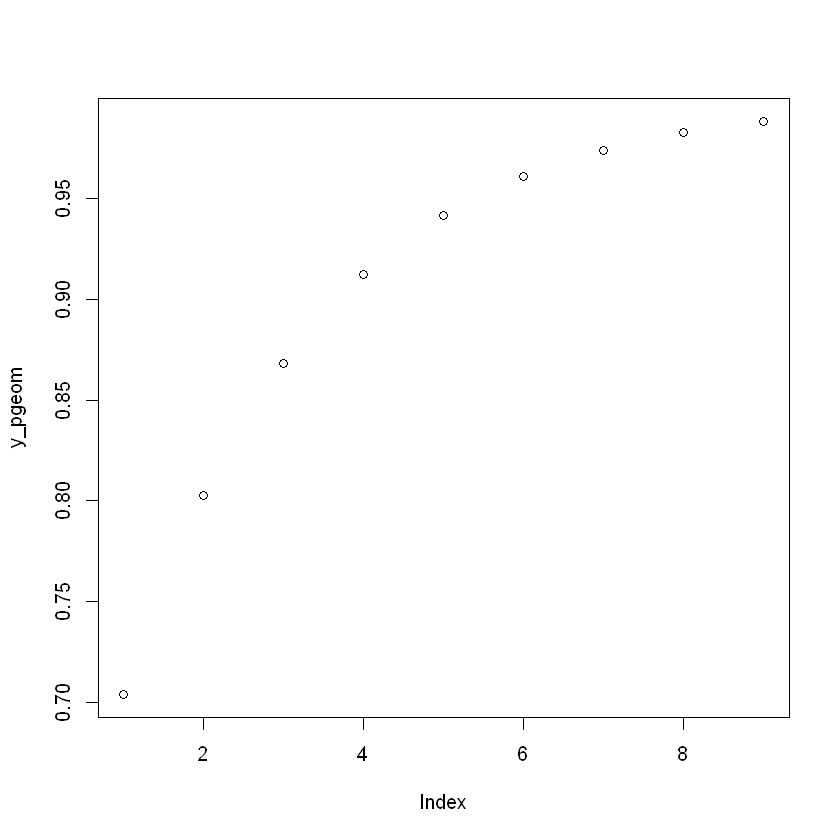

In [22]:
#illustrate the density of the geometric distribution in a plot.
# Specify x-values for dgeom function 
x_pgeom <- seq(2, 10, by = 1)     
  
# Apply dgeom function  
y_pgeom <- pgeom(x_pgeom, prob = 1/3)     
  
# Plot dgeom values  
plot(y_pgeom)  


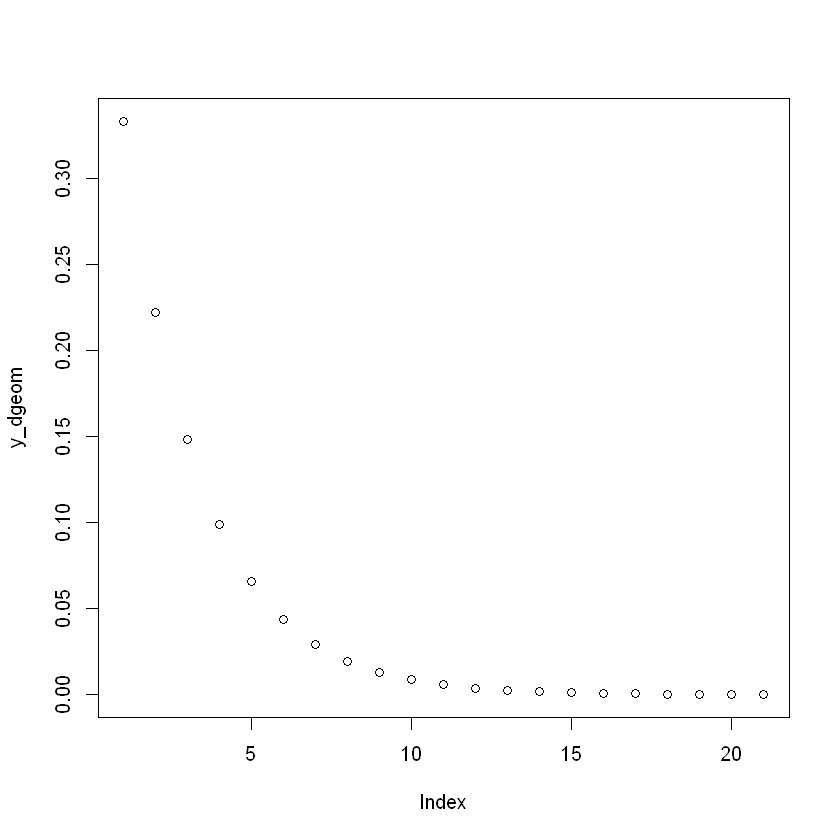

In [23]:
# shows how to draw a plot of the geometric 
#cumulative distribution function (CDF). 
# Specify x-values for dgeom function 
x_dgeom <- seq(0, 20, by = 1)     
  
# Apply dgeom function  
y_dgeom <- dgeom(x_dgeom, prob = 1/3)     
  
# Plot dgeom values  
plot(y_dgeom)   

\begin{exercise}
Computing geometric  probabilities.  Suppose  that the  inhabitants of an island plan their families by having babies until the first girl is born.  Assume the probability of having a girl with each pregnancy  is 0.5 independent of other pregnancies,  that all babies survive and there  are no multiple  births.  What  is the probability that a family has k boys? 

\end{exercise}





## Uniform Distribution

The uniform distribution models any situation where all the outcomes  are equally likely.

$$
X \sim \text { uniform }(N)
$$

$X$ takes values $1, 2, 3, \dots , N$, each with probability $1/N$.  We have already seen this distribution many times when modeling the fair coins ($N  = 2$), dice ($N  = 6$), birthdays ($N  = 365$),
and poker hands  ($N=\left(\begin{array}{c}52 \\ 5\end{array}\right)$).



## Arithmetic with Random Variables

We can do arithmetic with random  variables.  For example,  we can add subtract, multiply or square them.

There  is a simple,  but  extremely  important idea  for counting.   It  says that if we have  a sequence of numbers  that are either  0 or 1 then  the  sum of the  sequence is the  number  of
1s.

\begin{example}
Consider  the sequence with five 1s.
It is easy to see that the sum of this sequence is 5 the number  of 1s.
\end{example}



We illustrates this idea by counting  the number  of heads in n tosses of a coin.

\begin{example}

Toss a fair coin $n$ times.  Let $X_j$   be 1 if the  jth toss is heads  and  0 if it's tails.  So, $X_j$  is a Bernoulli(1/2) random  variable.   Let $X$  be the  total  number  of heads  in the  n tosses.  Assuming  the  tosses are independence,  we know $X \sim \operatorname{binomial}(n, 1 / 2)$.   We can also write

$X=X_{1}+X_{2}+X_{3}+\ldots+X_{n}$

\end{example}

Again, this is because the terms  in the sum on the right are all either  0 or 1.  So, the sum is exactly  the number  of $X_j$  that are 1, i.e. the number  of heads.

The important thing to see in the example above is that we've written  the more complicated binomial  random  variable  $X$  as the  sum  of extremely  simple random  variables  $X_j$.   This will allow us to manipulate X  algebraically.

\begin{exercise}
Suppose X and Y  are independent and $X \sim \operatorname{binomial}(n, 1 / 2)$ and $Y \sim \operatorname{binomial}(m, 1 / 2)$. What  kind of distribution does X + Y  follow? Explain.
\end{exercise}


\begin{exercise}
Suppose  X  and  Y   are  independent random  variables  with  the  following tables.

$$
\begin{array}{c|cccccc}
\text { Values of } X & x: & 1 & 2 & 3 & 4 & \\
\hline \text { pmf } & p_{X}(x): & 1 / 10 & 2 / 10 & 3 / 10 & 4 / 10 & \\
\text { Values of } Y & y: & 1 & 2 & 3 & 4 & 5 \\
\hline \text { pmf } & p_{Y}(y): & 1 / 15 & 2 / 15 & 3 / 15 & 4 / 15 & 5 / 15
\end{array}
$$

Check that the total probability for each random variable is 1. Make a table for the random
variable $X + Y$. 

\end{exercise}

